`Imports & Reading Data`

In [5]:
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import noisereduce as nr
import matplotlib.pyplot as plt 

from json_tricks import dump, load

[Dataset 1](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio) 

[Dataset 2](https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess)

In [ ]:
'''
Unzip evrything contained in the RAVDESS Emotional speech audio &
Toronto emotional speech set (TESS) datasets into a 'data/audio' 
folder path to work with code or use dataset as desired.
'''

In [6]:
def find_emotion_T(name): 
        if('neutral' in name): return "01"
        elif('happy' in name): return "03"
        elif('sad' in name): return "04"
        elif('angry' in name): return "05"
        elif('fear' in name): return "06"
        elif('disgust' in name): return "07"
        elif('ps' in name): return "08"
        else: return "-1"

In [7]:
def emotionfix(e_num):
    if e_num == "01":   return 0 # neutral
    elif e_num == "02": return 1 # calm
    elif e_num == "03": return 2 # happy
    elif e_num == "04": return 3 # sad
    elif e_num == "05": return 4 # angry
    elif e_num == "06": return 5 # fear
    elif e_num == "07": return 6 # disgust
    else:               return 7 # suprised

In [8]:
valid_extensions = ['.wav', '.mp3', '.ogg']

sample_lengths = []
base_dir = 'data/audio'

for subdir, dirs, files in os.walk(base_dir):
    for file in files:
        if any(file.endswith(ext) for ext in valid_extensions):
            x, sr = librosa.load(path=os.path.join(subdir, file), sr=None)
            xt, index = librosa.effects.trim(x, top_db=30)
            sample_lengths.append(len(xt))

print('Maximum sample length:', max(sample_lengths))


Maximum sample length: 204288


`Data Preprocessing`

In [9]:
rms = []
zcr = []
mfcc = []
emotions = []

total_length = max(sample_lengths) 
frame_length = 2048
hop_length = 512

base_dir = 'data/audio'

for subdir, dirs, files in os.walk(base_dir):
    for file in files:
        if any(file.endswith(ext) for ext in valid_extensions):
            x, sr = librosa.load(os.path.join(subdir, file), sr=None)
            xt, index = librosa.effects.trim(x, top_db=30)

            if len(xt) > total_length:
                xt = xt[:total_length] 

            padded_x = np.pad(xt, (0, total_length - len(xt)), 'constant')
            final_x = nr.reduce_noise(padded_x, sr=sr)

            f1 = librosa.feature.rms(y=final_x, frame_length=frame_length, hop_length=hop_length)
            f2 = librosa.feature.zero_crossing_rate(y=final_x, frame_length=frame_length, hop_length=hop_length, center=True)
            f3 = librosa.feature.mfcc(y=final_x, sr=sr, n_mfcc=13, hop_length=hop_length)

            if find_emotion_T(file) != "-1":
                name = find_emotion_T(file)
            else:
                name = file[6:8]

            rms.append(f1)
            zcr.append(f2)
            mfcc.append(f3)
            emotions.append(emotionfix(name))

In [10]:
# Adjusting features shape to the 3D format: (batch, timesteps, feature)
f_rms = np.asarray(rms).astype('float32')
f_rms = np.swapaxes(f_rms,1,2)
f_zcr = np.asarray(zcr).astype('float32')
f_zcr = np.swapaxes(f_zcr,1,2)
f_mfccs = np.asarray(mfcc).astype('float32')
f_mfccs = np.swapaxes(f_mfccs,1,2)

print('ZCR shape:',f_zcr.shape)
print('RMS shape:',f_rms.shape)
print('MFCCs shape:',f_mfccs.shape)

ZCR shape: (4240, 400, 1)
RMS shape: (4240, 400, 1)
MFCCs shape: (4240, 400, 13)


In [11]:
X = np.concatenate((f_zcr, f_rms, f_mfccs), axis=2)

Y = np.asarray(emotions).astype('int8')
Y = np.expand_dims(Y, axis=1)

In [12]:
x_data = X.tolist() 
x_path = '/tmp/X_datanew.json' 
dump(obj = x_data, fp = x_path)

y_data = Y.tolist() 
y_path = '/tmp/Y_datanew.json' 
dump(obj = y_data, fp = y_path)

'[[4], [5], [5], [4], [6], [3], [3], [6], [7], [7], [2], [2], [1], [0], [1], [2], [2], [1], [1], [0], [5], [4], [4], [5], [3], [6], [6], [3], [7], [7], [1], [0], [1], [2], [2], [6], [3], [3], [6], [4], [5], [5], [4], [7], [7], [3], [6], [6], [3], [5], [4], [4], [5], [7], [7], [0], [1], [1], [2], [2], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6]

In [13]:
X = load(x_path)
X = np.asarray(X, dtype = 'float32')

Y = load(y_path)
Y = np.asarray(Y, dtype = 'int8')

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_tosplit, y_train, y_tosplit = train_test_split(X, Y, test_size = 0.125, random_state = 1)
x_val, x_test, y_val, y_test = train_test_split(x_tosplit, y_tosplit, test_size = 0.304, random_state = 1)

y_train_class = tf.keras.utils.to_categorical(y_train, 8, dtype = 'int8')
y_val_class = tf.keras.utils.to_categorical(y_val, 8, dtype = 'int8')

print(np.shape(x_train))
print(np.shape(x_val))
print(np.shape(x_test))

(3710, 400, 15)
(368, 400, 15)
(162, 400, 15)


In [15]:
file_path = 'misc/x_test_data.json'
dump(obj = x_test, fp = file_path)

file_path = 'misc/y_test_data.json'
dump(obj = y_test, fp = file_path)

'{"__ndarray__": [[0], [4], [7], [6], [3], [0], [7], [0], [3], [2], [6], [4], [4], [4], [2], [4], [0], [0], [3], [0], [4], [7], [2], [3], [6], [2], [5], [2], [4], [2], [3], [2], [7], [5], [4], [6], [2], [7], [3], [5], [2], [2], [6], [7], [7], [0], [3], [0], [6], [5], [6], [0], [0], [6], [4], [0], [6], [4], [5], [7], [7], [7], [4], [4], [6], [7], [2], [2], [2], [7], [2], [4], [1], [6], [5], [1], [1], [2], [6], [4], [4], [0], [0], [7], [0], [2], [4], [0], [0], [0], [6], [4], [3], [5], [3], [6], [0], [1], [5], [0], [6], [5], [3], [2], [0], [3], [5], [4], [6], [3], [2], [1], [4], [0], [3], [7], [0], [5], [6], [0], [6], [5], [6], [5], [7], [1], [6], [4], [0], [3], [0], [6], [5], [6], [3], [7], [1], [0], [0], [7], [4], [1], [2], [6], [2], [0], [3], [0], [2], [0], [7], [3], [1], [3], [5], [5], [5], [7], [4], [3], [3], [3]], "dtype": "int8", "shape": [162, 1], "Corder": true}'

`Build Model & Train`

In [16]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, BatchNormalization, Dropout, Dense, Flatten

model = tf.keras.Sequential([
    Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X.shape[1:3])),
    BatchNormalization(),
    MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2), 
    
    Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),
    
    Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),
    
    Flatten(),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dense(8,activation='softmax')
])

model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-04-19 06:35:22.156349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-19 06:35:22.156750: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 400, 512)          38912     
                                                                 
 batch_normalization (Batch  (None, 400, 512)          2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 200, 512)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 200, 512)          1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 200, 512)          2048      
 chNormalization)                                                
                                                        

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint(
    'models/smodel.hdf5', 
    monitor='val_accuracy', 
    save_best_only=True,
    mode='max',
    )

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='auto',
    patience=5,
    restore_best_weights=True)

lr_reduction=ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

In [19]:
BATCH_SIZE = 64
history = model.fit(x_train, y_train_class, 
                      epochs=100, batch_size = BATCH_SIZE, 
                      validation_data = (x_val, y_val_class), 
                      callbacks=[early_stop,lr_reduction,model_checkpoint]
                      )


Epoch 1/100


2024-04-19 06:35:23.969021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<64x100x1x512xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<64x25x1x256xi

57/58 [============================>.] - ETA: 0s - loss: 1.2529 - accuracy: 0.5927

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<62x100x1x512xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<62x25x1x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerfor

58/58 [==============================] - ETA: 0s - loss: 1.2490 - accuracy: 0.5949

2024-04-19 06:35:38.169171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


58/58 [==============================] - 16s 151ms/step - loss: 1.2490 - accuracy: 0.5949 - val_loss: 24.6076 - val_accuracy: 0.1712 - lr: 0.0010
Epoch 2/100


/Users/maikyau/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/58 [==============================] - 7s 114ms/step - loss: 0.5937 - accuracy: 0.7935 - val_loss: 4.8175 - val_accuracy: 0.3016 - lr: 0.0010
Epoch 3/100
58/58 [==============================] - 6s 111ms/step - loss: 0.4565 - accuracy: 0.8332 - val_loss: 0.5493 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 4/100
58/58 [==============================] - 6s 109ms/step - loss: 0.4130 - accuracy: 0.8534 - val_loss: 0.7154 - val_accuracy: 0.7609 - lr: 0.0010
Epoch 5/100
58/58 [==============================] - 6s 112ms/step - loss: 0.3643 - accuracy: 0.8671 - val_loss: 0.5781 - val_accuracy: 0.7935 - lr: 0.0010
Epoch 6/100
58/58 [==============================] - ETA: 0s - loss: 0.3513 - accuracy: 0.8722
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
58/58 [==============================] - 6s 106ms/step - loss: 0.3513 - accuracy: 0.8722 - val_loss: 0.9840 - val_accuracy: 0.7717 - lr: 0.0010
Epoch 7/100
58/58 [==============================] - 6s 110ms/step - loss

In [ ]:
# Load best weights
model.load_weights('models/smodel.hdf5')

`Model Evaluation`

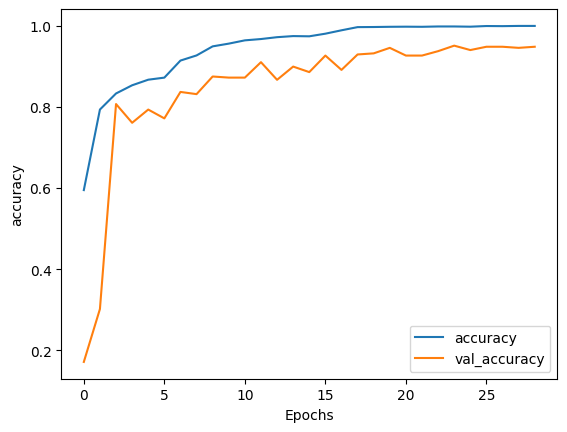

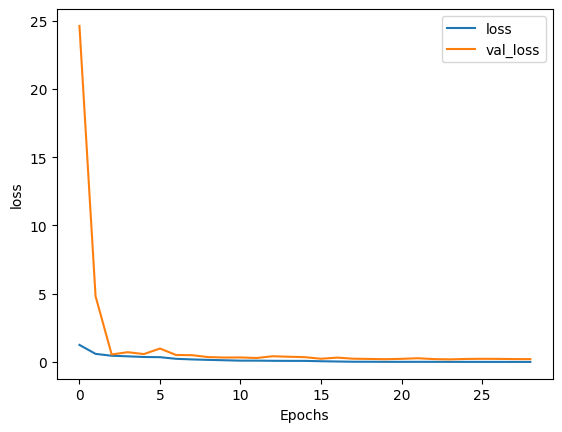

In [20]:
# Visualize Training Graph
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
# Evaluation on Validation Set
loss,acc = model.evaluate(x_val, y_val_class, verbose=2)

12/12 - 1s - loss: 0.1907 - accuracy: 0.9511 - 631ms/epoch - 53ms/step


2024-04-19 06:38:34.102311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 26ms/step


Text(0.5, 58.7222222222222, 'Predicted emotion')

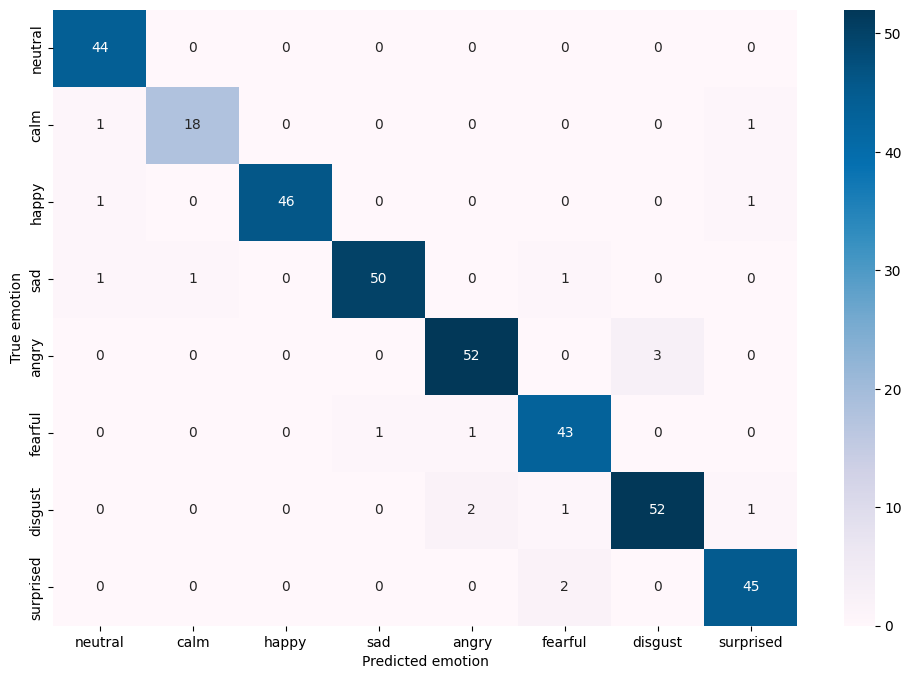

In [22]:
from sklearn.metrics import confusion_matrix

y_val_class = np.argmax(y_val_class, axis=1)
predictions = model.predict(x_val)
y_pred_class = np.argmax(predictions, axis=1)

cm=confusion_matrix(y_val_class, y_pred_class)

index = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
columns = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
 
cm_df = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(12,8))
ax = plt.axes()

sns.heatmap(cm_df, ax = ax, cmap = 'PuBu', fmt="d", annot=True)
ax.set_ylabel('True emotion')
ax.set_xlabel('Predicted emotion')

In [23]:
# Validation set prediction accuracy rates
values = cm.diagonal()
row_sum = np.sum(cm,axis=1)
acc = values / row_sum

print('Validation set predicted emotions accuracy:')
for e in range(0, len(values)):
    print(index[e],':', f"{(acc[e]):0.4f}")

Validation set predicted emotions accuracy:
neutral : 1.0000
calm : 0.9000
happy : 0.9583
sad : 0.9434
angry : 0.9455
fearful : 0.9556
disgust : 0.9286
surprised : 0.9574


In [24]:
# Saving model & weights
model_json = model.to_json()
saved_model_path = 'models/smodel.json'
saved_weights_path = 'models/smodel_weights.h5'

with open(saved_model_path, "w") as json_file:
    json_file.write(model_json)
    
model.save_weights(saved_weights_path)


In [25]:
with open(saved_model_path , 'r') as json_file:
    json_savedModel = json_file.read()
    
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights(saved_weights_path)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy'
              )

In [26]:
x_test = load( 'misc/x_test_data.json')
x_test = np.asarray(x_test).astype('float32')

y_test = load('misc/y_test_data.json')
y_test = np.asarray(y_test).astype('int8')

y_test_class = tf.keras.utils.to_categorical(y_test, 8, dtype = 'int8')

In [27]:
# Evaluation on Test Set
loss, acc = model.evaluate(x_test, y_test_class, verbose=2)

2024-04-19 06:38:36.361255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 - 1s - loss: 0.2838 - accuracy: 0.9383 - 1s/epoch - 211ms/step


2024-04-19 06:38:37.537385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 38ms/step


Text(0.5, 58.7222222222222, 'Predicted emotion')

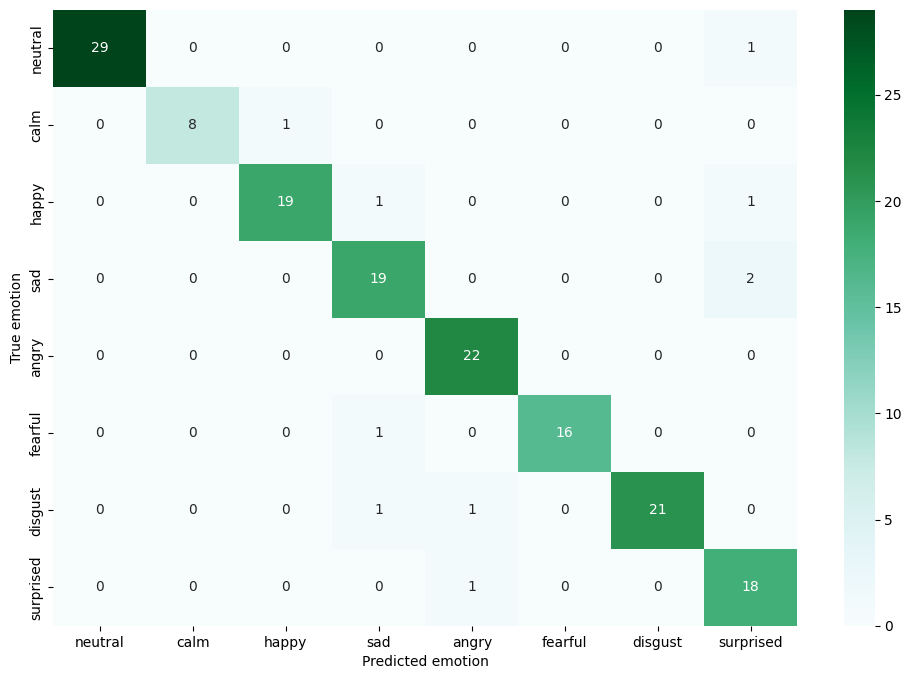

In [28]:
y_test_class = np.argmax(y_test_class, axis=1)
predictions = model.predict(x_test)
y_pred_class = np.argmax(predictions, axis=1)

cm=confusion_matrix(y_test_class, y_pred_class)

index = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
columns = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
 
cm_df = pd.DataFrame(cm,index,columns)                      
plt.figure(figsize=(12,8))
ax = plt.axes()

sns.heatmap(cm_df, ax = ax, cmap = 'BuGn', fmt="d", annot=True)
ax.set_ylabel('True emotion')
ax.set_xlabel('Predicted emotion')

In [29]:
# Test set prediction accuracy rates
values = cm.diagonal()
row_sum = np.sum(cm,axis=1)
acc = values / row_sum

print('Test set predicted emotions accuracy:')
for e in range(0, len(values)):
    print(index[e],':', f"{(acc[e]):0.4f}")

Test set predicted emotions accuracy:
neutral : 0.9667
calm : 0.8889
happy : 0.9048
sad : 0.9048
angry : 1.0000
fearful : 0.9412
disgust : 0.9130
surprised : 0.9474
